# firtez-dz library:
--------------------------------

In [1]:
import matplotlib.pyplot as pl
%matplotlib inline
import firtez_dz as frt

First, we are going to use test products to get use to some basic features of this python library.
<br>
We define some useful variables with the paths to be used

In [13]:
test_path = '../tests/'
test_1 = 'test_he/'
test_2 = 'test_tau1/'
test_3 = 'test_tau2/'
test_4 = 'test_syn1/'
test_5 = 'test_syn2/'
test_6 = 'test_inv1/'
default_path = '../default/'

Now, we read the model atmosphere provided in the default path.
<br>
To do so, we use the function called: read_model

In [14]:
in_model = frt.read_model('%s/test_atmos.bin' % (default_path,))

This function return an object with some built-in methods. One of those is plot, that allows plotting
some of the physical parameters defining the model atmosphere:
<br>
As you may notice, it is possible to supply a dictionary with any keyword arguments to be passed to the pl.subplots, except for the num, ncols, and nrows. The former is supplied (if desired) independently (by default fnum=1) and ncols and nrows can not be changed.

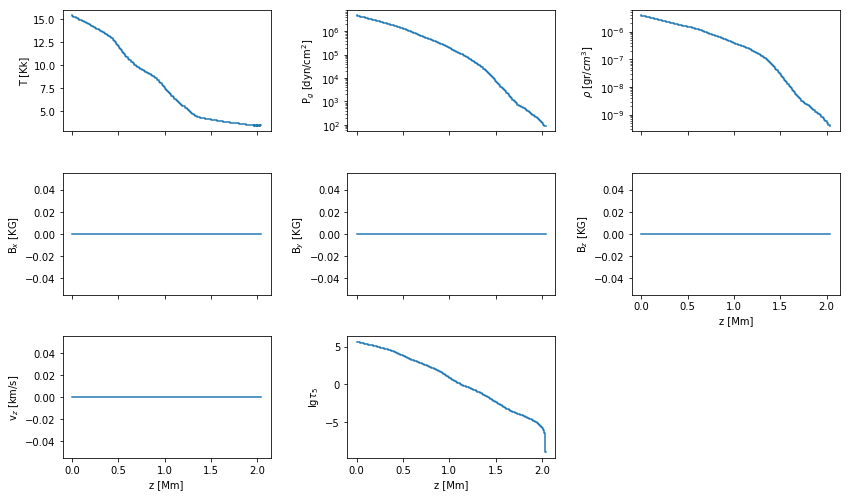

In [17]:
in_model.plot(fkwargs={'figsize':(12,7)})

Let read now the output atmosphere of the first test. Recall that in this test, we just re-calculate the
gas pressure and density under the assumption of hydrostatic equilibrium of the supplied model. To do so,
 the integration starts from the upper gas pressure boundary condition and integrates downwards. 

In [18]:
out_model_test1 = frt.read_model('%s/%s/out_test_atmos.bin' % (test_path,test_1,))

We can plot a different number of model atmospheres to compare them using the function: plot_models. To do so, we supply a list with the atmosphere models we want to plot together.
<br>
Appart from the previously mentioned keyword argument 'fkwargs', we can also provide a set of labels with 'labels', which has to be of the same length as the list of atmosphere models. The labels are assumed to be in the same order as the atmosphere models.

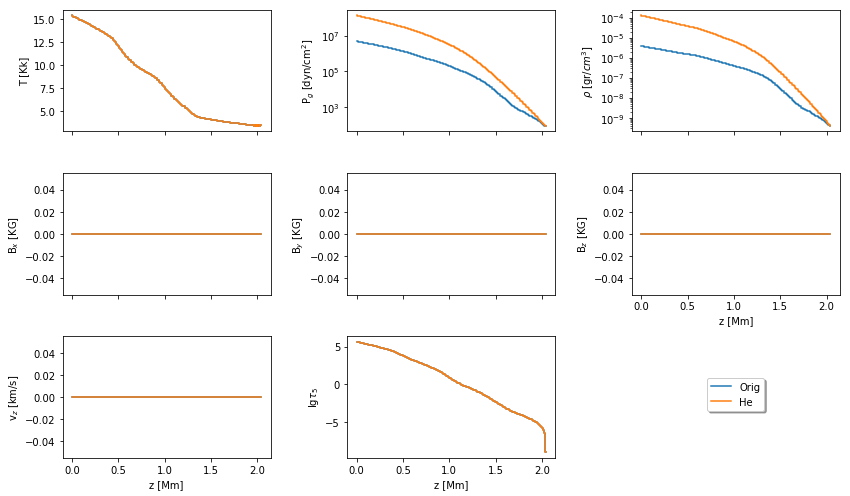

In [20]:
frt.plot_models([in_model, out_model_test1],labels=['Orig', 'He'],fkwargs={'figsize':(12,7)})

Now, we compare the input atmosphere model with the output of the two tests concerning tau calculation:
<br>
First, we read them:

In [7]:
out_model_test2 = frt.read_model('%s/%s/out_test_atmos.bin' % (test_path,test_2,))
out_model_test3 = frt.read_model('%s/%s/out_test_atmos.bin' % (test_path,test_3,))

And now, we use plot_models again. We use now an additional keyword argument 'linestyle' to change the style 
of the line used for each atmosphere model.

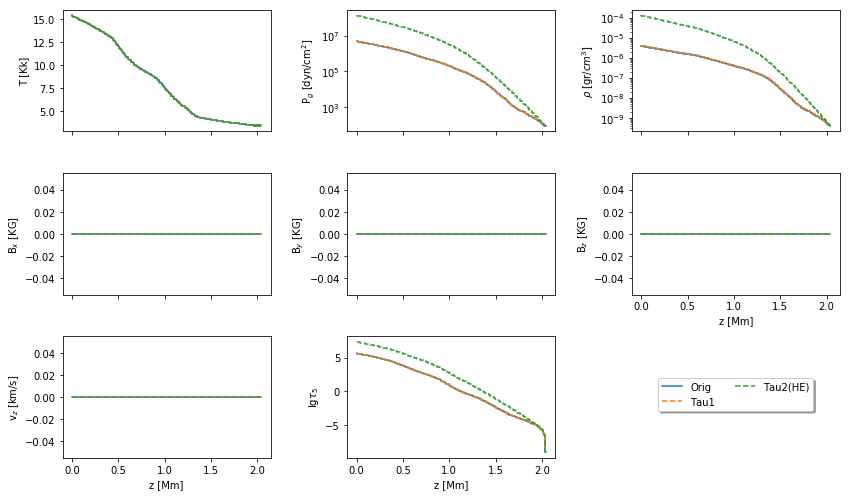

In [21]:
frt.plot_models([in_model, out_model_test2, out_model_test3],labels=['Orig', 'Tau1', 'Tau2(HE)'] \
                ,linestyle=['-', '--', '--'],fkwargs={'figsize':(12,7)})

As you may notice, 'out_model_test2' is the same as 'in_model' as they were computed under the same conditions while 
out_model_test3, which assumes hydrostatic equilibrium, shows different gas pressures (appart from the upper value, which is used to start the integration), different densities, and different optical depth.
<br>
It is also possible to use plot_models in optical depth scale instead of geometrical height. To do so, we have to 
add the "axis='t'" argument in the call. Also, one can limit the x axis range of values using 'rangex':

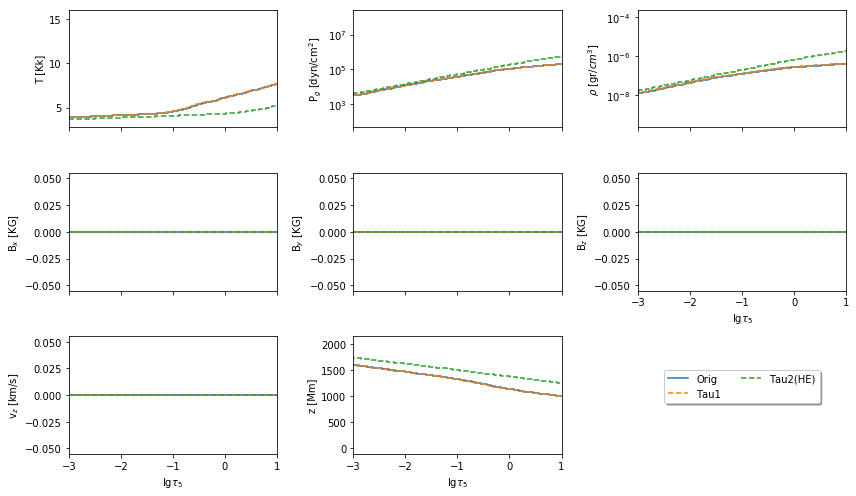

In [22]:
frt.plot_models([in_model, out_model_test2, out_model_test3],labels=['Orig', 'Tau1', 'Tau2(HE)'] \
                ,linestyle=['-', '--', '--'],fkwargs={'figsize':(12,7)}, axis='t', rangex=[-3,1])

Now that we have some basic knowledge on how to deal with atmosphere models, let move forward to 
Stokes profiles.
<br>
First, we read the output models for the synthesis tests (which by the way are the same as those coming from tau examples):

In [23]:
out_model_test4 = frt.read_model('%s/%s/out_dir/out_test_atmos.bin' % (test_path,test_4,))
out_model_test5 = frt.read_model('%s/%s/out_dir/out_test_atmos.bin' % (test_path,test_5,))

Reading Stokes profiles is done using 'plot_profiles' function, which returns a new class associated to 
Stokes profiles that have some proper methods.

In [10]:
out_profiles_test4 = frt.read_profile('%s/%s/out_dir/syn_profile.bin' % (test_path,test_4,))
out_profiles_test5 = frt.read_profile('%s/%s/out_dir/syn_profile.bin' % (test_path,test_5,))

Similarly to atmosphere model class, there is a method that allows plotting the Stokes profiles directly:

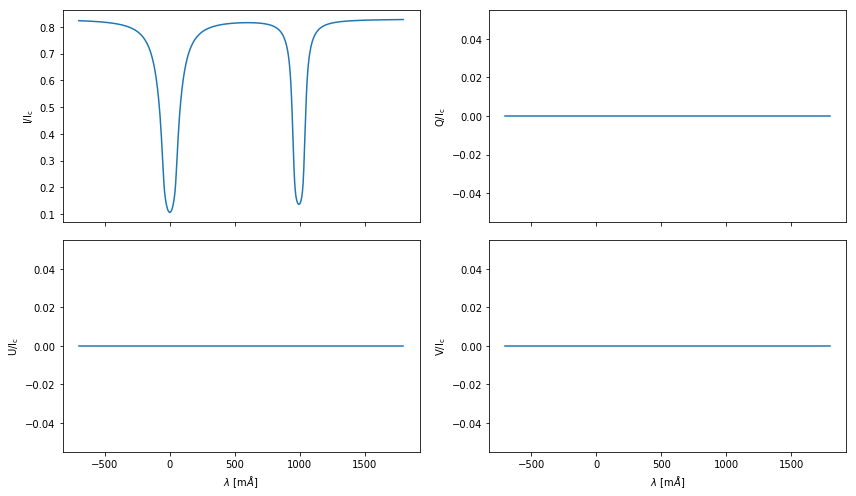

In [24]:
out_profiles_test4.plot(fkwargs={'figsize':(12,7)})

Similarly to the atmosphere model, there is a function'plot_profiles' that allows plotting several
 Stokes profiles provided by means of a list:

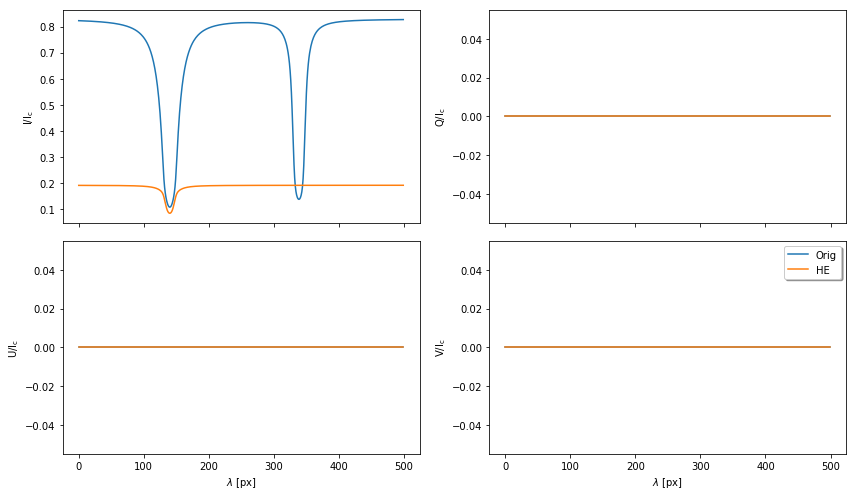

In [25]:
frt.plot_profiles([out_profiles_test4, out_profiles_test5],labels=['Orig', 'HE'] \
                ,linestyle=['-', '--'],fkwargs={'figsize':(12,7)}, axis='p')

Where we see that now, a few of the keyword arguments we saw for 'plot_models' function are still valid here. 
Note however that 'axis' argument in 'plot_profiles' can take different values to those for 'plot_models'. Here
 'axis' can be either 'p' to have the horizontal axis in pixels and 'w' to have it in mA.